
# 2.1 Probability and Statistics Bases for Robotics

The field of robotics has found great success using a probabilistic approach to handle uncertainty.
In contrast to industrial robots (manipulators), which reside in controlled environments, mobile robots (the focus of this book) have to adapt to additional detrimental factors such as: dynamic environments, sensor disturbances, or unreliable motion systems, among others.

The core principle of this **probabilistic robotics** is to represent this uncertainty as probability distribution. In most cases we will use the observations from the environment (usually denoted as $z_n$), to estimate the most probable state ($x_n$) and how certain this prediction is ($\Sigma_{x_n}$).

In the series of notebooks in this chapter we will overview the **gaussian distribution**, one of the most used probability distributions for modelling said uncertainty!

In [1]:
# IMPORTED LIBS

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 2.1.1 The gaussian distribution

The gaussian distribution (also known as Normal distribution) is caracterized by two parameters:

- The **mean** ($\mu$) is the expected value of the distribution.
- The **standard deviation** ($\sigma$) represents how dispersed are the possible values.

The **probability density function** (**pdf**) of a given Gaussian distribution is defined as:

$$
    N(x | \mu, \sigma^2) = 
        \frac{1}{\sqrt{2\pi\sigma^2}}
        e^{-\frac{1}{2\sigma^2}\left(x - \mu \right)^2}
$$

### **<span style="color:green"><b><i>ASSIGNMENT 1: Computing and plotting gaussians</i></b></span>**

Complete the following function in order to plot a gaussian pdf with $\mu = 2$ and $\sigma = 1$.

Evaluate this gaussian pdf in the interval $x \in [-5, 5]$, generating 100 samples between those values. 

<i>Hint: use the [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function, which returns evenly spaced numbers over a specified interval. The constant [`np.pi`](https://numpy.org/doc/stable/reference/constants.html) can be also useful, as well as `np.sqrt()` and `np.exp()`.</i>

In [2]:
def evaluate_gaussian(mu, sigma, X):
    """Evaluates a gaussian distribution between in the given points
    
    Args:        
        mu: mean of the distribution
        sigma: standard deviation of the distribution
        X: points where the function is going to be evaluated
    """
    variance = sigma**2 # Get the variance from the given standar deviation 
    res = (1/np.sqrt(2*np.pi*variance)) * np.exp(-((1/(2*variance))*((X-mu)**2))) # Implement the gaussian distribution computation 

    return res # An np.array containing the evaluation of the gaussian pdf at each point in X

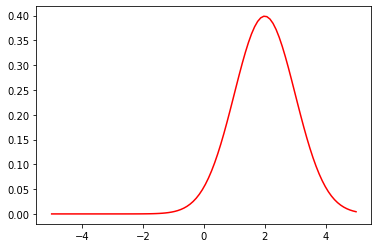

In [3]:
# RUN

# Gaussian parameters (mean and standard deviation)
mu = 2
sigma = 1

# Create the array of values where the gaussian distribution is going to be evaluated 
min_interval=-5
max_interval=5
n_samples=100
X = np.linspace(min_interval,max_interval, num=n_samples)

# Call the function and plot the results
res = evaluate_gaussian(mu, sigma, X)
plt.plot(X, res, 'r') # Show the results
plt.show() # Try what happens if you remove this line ;)

<span style="color:blue">Expected ouput:</span>

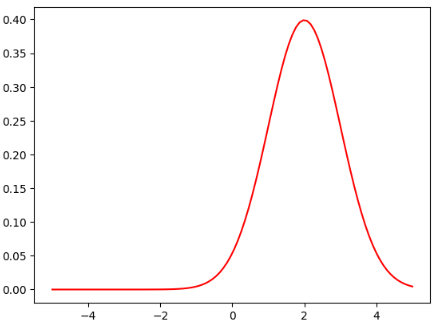

### Sampling from a distribution

Sampling from a random distribution consists of generating a set of values that follows that random probability distribution to a given extent.

This is of special interest because use of sampling in *particle filters*.

### **<span style="color:green"><b><i>ASSIGNMENT 2: Sampling from gaussians</i></b></span>**

Use the function [`randn()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) in the `random` module of numpy. 

This module contains functions to do sampling for a variety of random distributions. You can find additional documentation here: [Link](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

Sample a gaussian distribution with $\mu = 2$ and $\sigma = 2$. Then plot the resulting values along the x axis. 

![Example of a possible result](images/fig2-1-3.png)

In [4]:
def gen_samples(n, mu, sigma):
    """Generate n samples of a gaussian distribution
    
    Args:
        n: Number of samples
        mu: mean of the distribution
        sigma: standard deviation of the distribution

    Returns:
        array of samples
    """
    
    samples = sigma * np.random.randn(n) + mu
    return samples

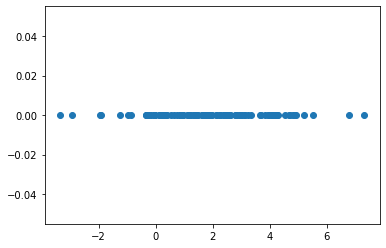

In [5]:
# RUN
num = 100
mu = 2
sigma = 2
plt.scatter(gen_samples(num, mu, sigma), np.zeros(num))

### <font color="blue"><b><i>Thinking about it (1)</i></b></font>

Having completed the code above, you will be able to **answer the following questions**:

- Which value do the samples concentrate around? Why?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Como ya sabemos, el parámetro mu repesenta el valor esperado de la distribución gaussiana. Como en ambos casos indicamos que mu sea dos, es de esperar que la mayor parte de las pruebas que hemos realizado se concentren alrededor de este valor.</i></p>

- Why we observe less samples the further they are from that value??

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Es una mera consecuecia probabilística. Como ambos casos siguen una distribución gaussiana, a medida que nos alejemos de dicho valor esperado, la probabilidad de obtener un resultado es menor (siguiendo la propia curva de la distribución).</i></p>

Indeed, if we keep sampling the distribution and build an histogram of the obtained samples, the resulting histogram will be similar to its respective gaussian given a large enough number of samples. 

### **<span style="color:green"><b><i>ASSIGNMENT 3: Building an histogram of samples</i></b></span>**

For checking this, we ask you to:

1. Create a large sample vector, i.e. size 1000.

2. Then, complete the function `hist_slice()`, which takes an array of samples and an integer `n`. This function plots the first `n` values of the array as a **histogram**.

3. To show the results of the exercise we will employ the use of Jupyter widgets. You can find more info about them here [[link]](https://ipywidgets.readthedocs.io/en/latest/index.html), but for the time being use the commented call to `interact`.

Play around with different parameters of the [`plt.hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) function from matplotlib.

The bars of the histogram should be normalized by the total area. (HINT: Set the optional `density` and `stacked` parameters of `hist()` to True)

![](images/fig2-1-4.png)

In [6]:
def hist_slice(samples, n):
    """Plot histogram for the first n values in samples"""        
    X = np.linspace(-5., 8., n)
    plt.plot(X, evaluate_gaussian(np.mean(samples[0:n]), np.std(samples[0:n]), X), 'r')
    plt.hist(samples[0:n] , bins=40, edgecolor='black', density=True, stacked=True)    
    plt.xlabel("Samples for N = %d" % n)
    plt.show()

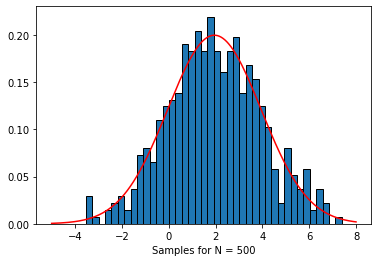

In [8]:
# RUN
random.seed(0)
samples = gen_samples(1000, 2, 2)
n = 500
hist_slice(samples, n)

In [9]:
# RUN
interact(hist_slice, samples=fixed(samples), n=(100, 1000, 100))

interactive(children=(IntSlider(value=500, description='n', max=1000, min=100, step=100), Output()), _dom_clas…

<function __main__.hist_slice(samples, n)>

## 2.1.2 Properties of the Gaussian distribution

Once we have acquired a certain amount of familiarity with the gaussian distribution, we can go along some of its principal properties, which are the main reason of this distribution's wide usage in robotics.

In [10]:
# Imports

from scipy import stats
from scipy import signal

### Central limit theorem

**Property.** The sum of N independent and identically distributed (i.i.d.) random variables, i.e. that belong to the same distribution and are independant to each other, becomes increasingly Gaussian the larger is N.

This property holds true regardless of the probability distribution was used to create the samples. It is one of the key concepts in probability, as it allows the generalization of many problems.

You can see a video demonstration of this by running the cell bellow:

In [37]:
%%HTML
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/dlbkaurTAUg?autoplay=0&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

### **<span style="color:green"><b><i>ASSIGNMENT 4: Verifying the central limit theorem</i></b></span>**

We ask you to create a similar demonstration as the example above.

- Complete the following `plot_sum_demo` function. This function returns a vector of length `v_length`, which results from the sum of `N` randomly generated vectors using an uniform distribution $[0, 1)$. Each random vector should have the same length (for example `v_lenght=100`).
- Inside the function, plot the corresponding histogram.
- Finally, check that the resulting figure has the shape of a gaussian. 

In [11]:
def plot_sum(v_length, N):
    
    #create the vector for storing the sums
    sum_samples = np.zeros(v_length)
    
    # Generate N vectors of samples and sum them within sum_samples
    for _ in range(0, N):
        sum_samples += random.rand(v_length)
        
    # Plot the resultant histogram
    plt.hist(sum_samples,
             bins=25, density=True,
             stacked=True, edgecolor='black')    

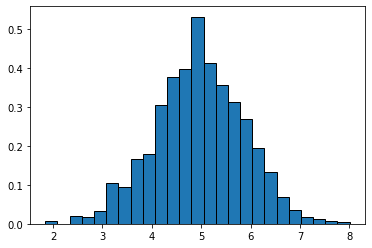

In [12]:
# RUN
v_length = 1000
N = 10
plot_sum(v_length, N)

Now play a bit with the number of randomly generated vectors

In [13]:
interact(plot_sum, v_length=fixed(v_length), N=(0, 25, 1))

interactive(children=(IntSlider(value=12, description='N', max=25), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_sum(v_length, N)>

### Product of gaussians' pdfs

The weighted sum of two gaussians' pdfs, results in a random variable which is the product of both. This product of 2 gaussians' pdfs is defined as:

$$
     N\left(
        \frac{\sigma_2^2\mu_1+\sigma_1^2\mu_2}
        {\sigma_1^2+\sigma_2^2},
         \frac{\sigma_1^2 \sigma_ 2^2}
         {\sigma_1^2 + \sigma_ 2^2}
     \right)
$$

Note: The product of two gaussian random variables is not gaussian distribude!

### **<span style="color:green"><b><i>ASSIGNMENT 5: Multiplying gaussians</i></b></span>**

Complete the following function to compute the product of two gaussians distributions.

Draw the result and check that corresponds to the formula above playing with different distributions.

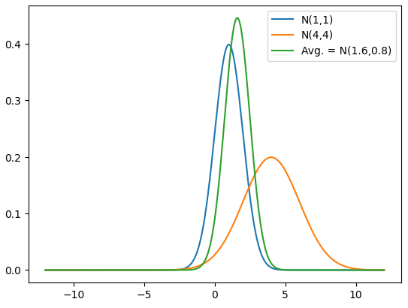

In [14]:
def gaussians_product(mu1,mu2,sig1,sig2,x):
    
    var1, var2 = sig1**2, sig2**2 # Get the variances from the standar deviations

    X = np.arange(-12, 12, 1/x)
    pdf1 = stats.norm(loc=mu1, scale=sig1).pdf(X)
    pdf2 = stats.norm(loc=mu2, scale=sig2).pdf(X)

    plt.plot(X, pdf1, label='N({},{})'.format(mu1, var1))
    plt.plot(X, pdf2, label='N({},{})'.format(mu2, var2))
    
    # Get the parameters defining the gaussian distribution resulting from their product
    mu3 = (var2*mu1+var1*mu2)/(var1+var2)
    sig3 = np.sqrt((var1*var2)/(var1+var2))
    c = stats.norm(loc=mu3, scale=sig3).pdf(X)

    plt.plot(X, c, label='Avg. = N({},{})'.format(mu3, sig3**2))
    plt.legend()


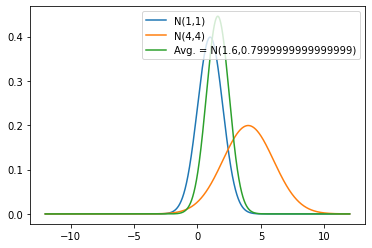

In [15]:
mu1, sig1 = 1, 1
mu2, sig2 = 4, 2
x = 1000    

gaussians_product(mu1,mu2,sig1,sig2,x)

### Linear transformation of gaussian random variables.

**Property.** The gaussian distributions are closed under linear transformations, i.e. when we apply a sum or product to normal random variables, the result is also a normal random variable. Concretely if $x \sim N(\mu,\sigma^2)$, then the linear transformation $y = a x + b$ results in $y \sim N(a \mu + b, a^2\sigma^2)\$.

This is also a remarkable property, for example in the field of robotics we can *operate normally over random distributions* as long as we only use linear functions.
Otherwise, if we are in need to apply a *non-linear transformation* (e.g. sine, cosine, ...), the resulting probability distribution *will not correspond to any Gaussian pdf*, causing additional complications in the process.

### **<span style="color:green"><b><i>ASSIGNMENT 6: Applying linear transformations</i></b></span>**

- Generate a number `n_samples` of random samples from the dist. $N(1,1)$.
- Then transform it following the expression $y = a*x + b$ and plot the result for $a=b=2$.
- Finally, draw on top the pdf of $N(4,2)$ and check that both are the same.

![](images/fig2-2-4.png)

In [16]:
def linear_transformation(n_samples, a, b):
    """Apply lineal transform. Generating n_samples samples from N(1,1)"""
    
    # Generates n_samples from N(1,1)
    mu = 1
    stdv = 1
    var = stdv**2
    samples = stats.norm(loc=mu, scale=stdv).rvs(n_samples)
    
    samples_2 = a * samples + b # Apply the linear transformation to the samples

    # Plot histogram (blue bars)
    n, bins, patches = plt.hist(samples_2, bins=90, density=True, stacked=True)

    delta = 1/samples.size 
    X = np.arange(bins[0], bins[-1], delta)
    A = stats.norm(loc=1, scale=1).pdf(X) # Evaluate N(1,1) in X
    B = stats.norm(loc=a*mu+b, scale=a*var).pdf(X) # Evaluate the resultant distribution in X
    
    # Show results
    plt.plot(X, A, color='orange', label='N({},{})'.format(mu, var))
    plt.plot(X, B, color='green', label='N({},{})'.format(a*mu+b, a*var*a))
    plt.legend()

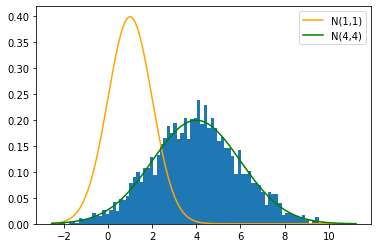

In [17]:
# RUN
n_samples = 3000
a = 2
b = 2
linear_transformation(n_samples, a, b)

Now play a bit with different values for $a$ and $b$.

In [18]:
interact(linear_transformation, n_samples=fixed(n_samples), b=(-5, 5, 1), a=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=0, description='b', …

<function __main__.linear_transformation(n_samples, a, b)>

## 2.1.3 Bidimensional normal distribution

Most useful applications of gaussian distributions does not only look at individual distributions or variables, but an assortment of random distributions which can be dependant to each other. Some examples of these *multidimensional distributions* we will use in following exercises are: the pose of a robot $(x, y, \theta)$, an observation from a series of range sensors $([z_0, z_1, \dots, z_n])$, among others. 

In the specific case of Gaussian distributions they present certain key differences:

- The *mean* $(\mu)$ now it contains a vector of $n$ values $([\mu_1, \mu_2, \dots, \mu_n]')$. Its dimensionality/shape is $(n \times 1)$, i.e. is a vertical vector.
- The *covariance* (now referred as $\Sigma$) is a full-blown matrix of shape $(n \times n)$. The case being, now we need to express the relations (i.e. dependence) of each variable to the rest.

In [19]:
# Imports
from numpy import linalg
import sys
sys.path.append("..")
from utils.PlotEllipse import PlotEllipse

### Sum of bidimensional random variables

In this exercise, we will take a look at how gaussians beheave when we sum 2 multidimensional random variables (*RV*).

Given the sum of 2 multidimensional gaussian RVs $(X_1, X_2)$, the resulting RV $(X_3)$ also follows a gaussian distribution defined as:

$$
    \left.
    \begin{aligned}
    X_1 &\sim N(\mu_1, \Sigma_1) \\
    X_2 &\sim N(\mu_2, \Sigma_2) \\
    X_3 &= X_1 + X_2
    \end{aligned}
    \enspace\right\}\enspace 
    X_3 \sim N(\mu_1 + \mu_2, \Sigma_1 + \Sigma_2)
$$

### **<span style="color:green"><b><i>ASSIGNMENT 7: Summing linear transformations</i></b></span>**

1. Generate and draw `n_samples` random samples from 2 different bidimensional dists. $N_1=N(\mu_1,\Sigma_1)$ y $N_2=N(\mu_2,\Sigma_2)$. The *mean* $(\mu_n)$ is a vector of dimension $(2 \times 1)$ and the *covariance* $(\sigma_n)$ a matrix $(2 \times 2)$. They represent the mean and covariance of each dist. respectively. Use the function `multivariate_normal` from the module **scipy.stats**.
2. Draw both ellipses associated with each distribution. Use `PlotEllipse()` from the utils library that comes with these notebooks.
3. Sum both samples and draw the ellipse $x_3 \sim N(\mu_1+\mu_2, \Sigma_1+\Sigma_2)$

WARN: When passing the mean to the `PlotEllipse()` function, it takes a vector $(2 \times 1)$, whereas `multivariate_normal()` takes a flat array $(1 \times 2).$

**Example**

Results for an example:

```python
    n_samples = 500
    
    mean1 = np.vstack([1, 0])
    sigma1 = np.array([[3, 2], [2, 3]])
    mean2 = np.vstack([2, 3])
    sigma2 = np.array([[2, 0], [0, 1]]) 
```

<figure style="text-align:center">
  <img src="images/fig2-3-1.png" alt="">
  <figcaption>Fig. 1: Distribution of the sum of two RVs (in blue and red)</figcaption>
</figure>

In [22]:
def sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples):
    
    fig, ax = plt.subplots()

    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean=mean1.flatten(), cov=sigma1) # Hint: you have to use .flatten()
    pdf2 = stats.multivariate_normal(mean=mean2.flatten(), cov=sigma2)

    # Generate n_samples from them
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)

    # Draw samples as crosses
    plt.scatter(rvs1[:,0],rvs1[:,1], marker='+', label="N1")
    plt.scatter(rvs2[:,0],rvs2[:,1], marker='+', color='red', label="N2")

    # Draw ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='blue')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='red')

    # Compute and draw N1 + N2
    rvs3 = stats.multivariate_normal(mean1.flatten()+mean2.flatten(), sigma1+sigma2).rvs(n_samples)
    plt.scatter(rvs3[:,0],rvs3[:,1], marker='+',color='magenta', label="N1+N2")
    PlotEllipse(fig, ax, mean1+mean2, sigma1+sigma2, mult, color='magenta')
    plt.legend()

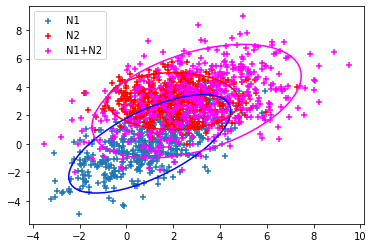

In [23]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples)

### Product of gaussian pdfs

The product of two gaussian distributions (*pdfs*) is also a gaussian distribution.
This distribution corresponds to the weighted mean of samples from that same *pdfs*.

Given two gaussian distributions $N_1 \sim N(\mu_1, \Sigma_1)$ and $N_2 \sim N(\mu_2, \Sigma_2)$, the resulting gaussian $N_3$ is defined as:

$$
\begin{equation}
    \Sigma_3 = (\Sigma_1^{-1} +\Sigma_2^{-1} )^{-1} \\
    \mu_3 =
           \Sigma_3
        \left(
            \Sigma_1^{-1} \mu_1 + \Sigma_2^{-1} \mu_2
        \right)\\
     N_3 \sim N
         \left(
             \mu_3,
             \Sigma_3
         \right)
\end{equation}
$$

### **<span style="color:green"><b><i>ASSIGNMENT 8: Multiplying bidimensional distributions</i></b></span>**

Given the two samples from the previous exercise, draw the ellipse (corresponding gaussian) that represents their weighted mean.

**Example**

<figure style="text-align:center">
  <img src="images/fig2-3-2.png" alt="Trulli">
  <figcaption>Fig. 2: Product of two pdfs (in blue and green)</figcaption>
</figure> 

In [24]:
def bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples):

    fig, ax = plt.subplots()
    
    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean=mean1.flatten(), cov=sigma1)
    pdf2 = stats.multivariate_normal(mean=mean2.flatten(), cov=sigma2)

    # Generate n_samples 
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)
    
    # Draw the samples
    plt.scatter(rvs1[:,0],rvs1[:,1], marker='+', color='green')
    plt.scatter(rvs2[:,0],rvs2[:,1], marker='+', color='blue')
   
    # Calculate average of distributions
    invs1 = linalg.inv(sigma1) # Hint use linalg.inv
    invs2 = linalg.inv(sigma2)

    sigma3 = linalg.inv(invs1+invs2)
    mean3 = sigma3 @ (invs2 @ mean1 + invs1 @ mean2) # Hint: use the @ operator

    # Plot the ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='green')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='blue')
    PlotEllipse(fig, ax, mean3, sigma3, mult*1.5, color='magenta') 

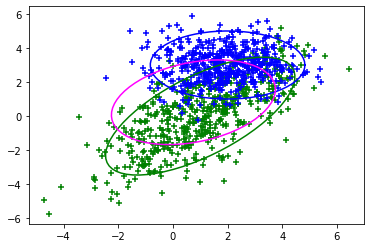

In [25]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples)

### Linear transformation of normal RVs

As we mentioned at the start of this unit, when we linearly transform a gaussian random variable, the result is still a gaussian. This is a very desirable property to have, as it allows us to operate normally, as long as the functions are linear.

### **<span style="color:green"><b><i>ASSIGNMENT 9: Applying linear transformation to bidimensional distributions</i></b></span>**

Using the previous samples $x_1$, check that the transformation $x_5 = A*x_1 +b$ results in a normal dist. $N(A \mu_1+b, A \Sigma_1 A^T)$. Given the matrices `A` and `b` in the code below.

**Example**

Example of the result at scale=2.5 and the values given below:

<figure style="text-align:center">
  <img src="images/fig2-3-3.png" alt="">
  <figcaption>Fig. 3: Linear transformation of RVs. Original samples (in blue) and results (in magenta)</figcaption>
</figure>

In [26]:
def bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples):
    
    fig, ax = plt.subplots()
    
    # Define the linear transformation
    A = np.array([[-1, 2], [2, 1.5]])
    b = np.vstack([3, 0])

    # Build distribution
    pdf1 = stats.multivariate_normal(mean1.flatten(), sigma1)

    # Draw samples from it
    rvs1 = pdf1.rvs(n_samples).T

    # Show the samples
    ax.set_xlim((-16, 20))
    ax.set_ylim((-11, 16))
    ax.scatter(rvs1[0], rvs1[1], marker='+', label="x1")

    # Apply linear transformation transformacion lineal
    x5 = A@rvs1+b # Hint: use the @ operator

    # Show the new samples and its ellipse
    ax.scatter(x5[0], x5[1], marker='.', color='magenta', label='A*x1+b')
    PlotEllipse(fig, ax, A@mean1+b, A@sigma1@(A.T), 2.5, color='magenta')
    ax.legend()

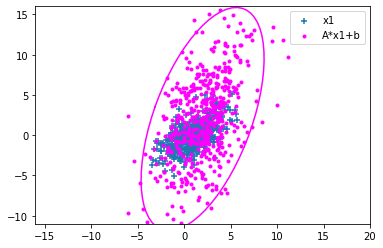

In [27]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])
    
bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples)